In [2]:
# 경고무시
import warnings
warnings.filterwarnings(action='ignore', category=DeprecationWarning)

In [3]:
# load library
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import matplotlib as mpl
mpl.rcParams['axes.unicode_minus'] = False
plt.rcParams['font.family'] = 'Malgun Gothic'
plt.rcParams['font.size'] = 10

In [39]:
# load data
# 2021-01-01_2021-06-30
online_data = pd.read_csv("C:/nh/인구통계_백미혼합곡.csv")
online_data.head()

,상품카테고리(세),상품명,무게,성별,나이,결제금액,결제수,결제상품수량,환불금액,환불건수,환불수량,실결제금액,실결제수량
0,백미,김포금쌀 고시히카리,10kg,여성,41~45,"4,154,200",84,99,"169,800",4,4,3984400,95
1,백미,김포금쌀 고시히카리,10kg,여성,36~40,"2,932,200",67,70,"123,700",3,3,2808500,67
2,백미,김포금쌀 고시히카리,10kg,여성,31~35,"2,684,000",60,64,"167,700",4,4,2516300,60
3,백미,NH신동진쌀,20kg,여성,46~50,"2,659,800",37,42,"63,400",1,1,2596400,41
4,백미,NH신동진쌀,20kg,여성,41~45,"2,587,400",39,41,"125,800",2,2,2461600,39


In [5]:
# 결측치 확인
online_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 907 entries, 0 to 906
Data columns (total 13 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   상품카테고리(세)  907 non-null    object
 1   상품명        907 non-null    object
 2   무게         907 non-null    object
 3   성별         907 non-null    object
 4   나이         907 non-null    object
 5   결제금액       907 non-null    object
 6   결제수        907 non-null    int64 
 7   결제상품수량     907 non-null    int64 
 8   환불금액       907 non-null    object
 9   환불건수       907 non-null    int64 
 10  환불수량       907 non-null    int64 
 11  실결제금액      907 non-null    int64 
 12  실결제수량      907 non-null    int64 
dtypes: int64(6), object(7)
memory usage: 92.2+ KB


In [6]:
# 통계량 파악
online_data['상품명'].describe()

count             907
unique             94
top        탑마루쌀(신동진) 
freq               70
Name: 상품명, dtype: object

In [7]:
# 통계량 파악
online_data['성별'].describe()

count     907
unique      2
top        여성
freq      498
Name: 성별, dtype: object

In [8]:
# 통계량 파악
online_data['나이'].describe()

count       907
unique       13
top       41~45
freq        124
Name: 나이, dtype: object

In [9]:
# 성별에 따른 수량
grouped_name_m = online_data.groupby('성별').sum()['실결제수량']
grouped_name_m.head(20)

성별
남성    1692
여성    2962
Name: 실결제수량, dtype: int64

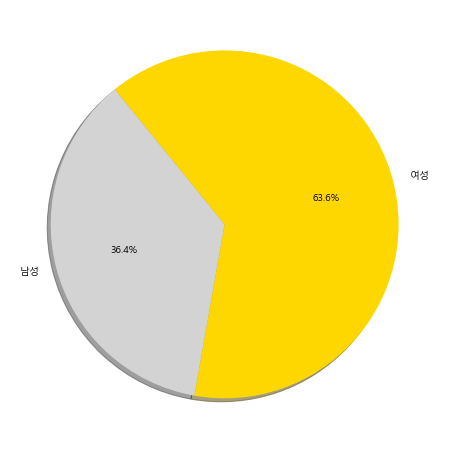

In [18]:
ratio = [1692, 2962]
labels = ['남성','여성']
explode = (0.0, 0.0)
colors = ['lightgray', 'gold']

fig = plt.figure(figsize=(8,8))
fig.set_facecolor('white')
ax = fig.add_subplot()

plt.pie(ratio, labels=labels, autopct='%.1f%%', startangle=260, counterclock=False, explode=explode, shadow=True, colors=colors)
plt.show()

In [10]:
# 성별에 따른 결제금액
grouped_name_m = online_data.groupby('성별').sum()['실결제금액']
grouped_name_m.head(20)

성별
남성     74845100
여성    129231500
Name: 실결제금액, dtype: int64

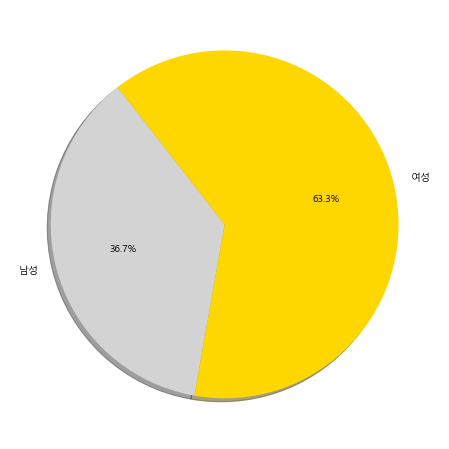

In [19]:
ratio = [74845100, 129231500]
labels = ['남성','여성']
explode = (0.0, 0.0)
colors = ['lightgray', 'gold']

fig = plt.figure(figsize=(8,8))
fig.set_facecolor('white')
ax = fig.add_subplot()

plt.pie(ratio, labels=labels, autopct='%.1f%%', startangle=260, counterclock=False, explode=explode, shadow=True, colors=colors)
plt.show()

In [11]:
# 연령에 따른 수량
grouped_name_m = online_data.groupby('나이').sum()['실결제수량']
grouped_name_m.head(20)

나이
14~16      1
17~19      2
20~25    149
26~30    390
31~35    614
36~40    892
41~45    859
46~50    799
51~55    478
56~60    278
61~65    117
66~70     43
71+       32
Name: 실결제수량, dtype: int64

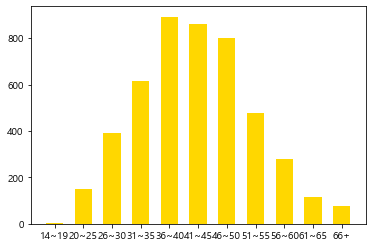

In [12]:
# 자녀나이 결제상품수량 파악
x = np.arange(11)
years = ['14~19','20~25','26~30','31~35','36~40','41~45','46~50','51~55','56~60','61~65','66+']
values = [3, 149, 390, 614, 892, 859,799,478,278,117,75]

plt.bar(x, values, width=0.6, color="gold",
        linewidth=3, tick_label=years)

plt.show()

In [40]:
# 연령에 따른 선호 곡물
grouped_name_s_r = online_data.groupby(['나이','상품카테고리(세)'])['실결제수량'].sum()
grouped_name_s_r

나이     상품카테고리(세)
14~16  백미             1
17~19  백미             2
20~25  백미           144
       혼합곡            5
26~30  백미           386
       혼합곡            4
31~35  백미           600
       혼합곡           14
36~40  백미           869
       혼합곡           23
41~45  백미           836
       혼합곡           23
46~50  백미           726
       혼합곡           73
51~55  백미           468
       혼합곡           10
56~60  백미           276
       혼합곡            2
61~65  백미           117
66~70  백미            41
       혼합곡            2
71+    백미            32
Name: 실결제수량, dtype: int64

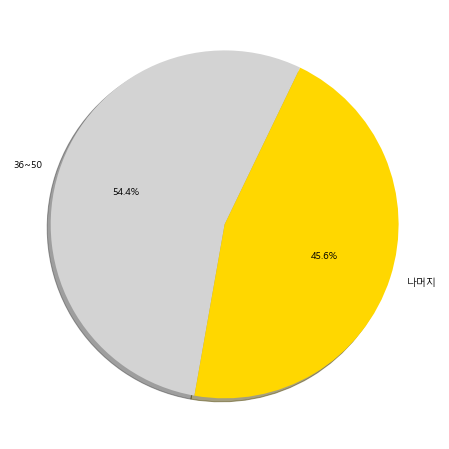

In [20]:
ratio = [2550, 2140]
labels = ['36~50','나머지']
explode = (0.0, 0.0)
colors = ['lightgray', 'gold']

fig = plt.figure(figsize=(8,8))
fig.set_facecolor('white')
ax = fig.add_subplot()

plt.pie(ratio, labels=labels, autopct='%.1f%%', startangle=260, counterclock=False, explode=explode, shadow=True, colors=colors)
plt.show()

In [13]:
# 연령에 따른 결제금액
grouped_name_m = online_data.groupby('나이').sum()['실결제금액']
grouped_name_m.head(20)

나이
14~16       63500
17~19       79300
20~25     6071700
26~30    15177600
31~35    24682300
36~40    38426200
41~45    38772700
46~50    36434400
51~55    22476600
56~60    12886100
61~65     5374800
66~70     2011400
71+       1620000
Name: 실결제금액, dtype: int64

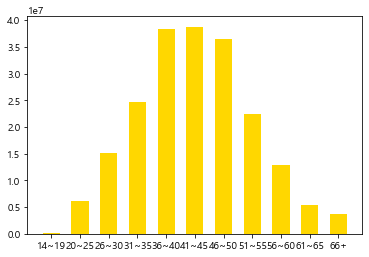

In [14]:
# 나이 결제금액 파악
x = np.arange(11)
years = ['14~19','20~25','26~30','31~35','36~40','41~45','46~50','51~55','56~60','61~65','66+']
values = [142800, 6071700, 15177600, 24682300, 38426200, 38772700,36434400,22476600,12886100,5374800,3631400]

plt.bar(x, values, width=0.6, color="gold",
        linewidth=3, tick_label=years)

plt.show()

# 백미

In [30]:
# load data
# 2021-01-01_2021-06-30
online_data = pd.read_csv("C:/nh/인구통계_전처리_백미.csv")
online_data.head()

,상품카테고리(세),상품명,무게,성별,나이,결제금액,결제수,결제상품수량,환불금액,환불건수,환불수량,실결제금액,실결제수량
0,백미,NH신동진쌀,20kg,여성,46~50,"2,659,800",37.0,42.0,"63,400",1.0,1.0,2596400.0,41.0
1,백미,NH신동진쌀,20kg,여성,41~45,"2,587,400",39.0,41.0,"125,800",2.0,2.0,2461600.0,39.0
2,백미,NH신동진쌀,20kg,여성,36~40,"2,338,800",34.0,37.0,"252,600",4.0,4.0,2086200.0,33.0
3,백미,NH신동진쌀,20kg,여성,51~55,"1,455,200",23.0,23.0,0,0.0,0.0,1455200.0,23.0
4,백미,NH신동진쌀,20kg,남성,41~45,"1,197,600",17.0,19.0,0,0.0,0.0,1197600.0,19.0


In [31]:
# 상품명 수량 파악
grouped_name_c = online_data_1['상품명'].value_counts()
grouped_name_c.head(20)

 탑마루쌀(신동진)           70
 한수위 파주쌀             40
 의성진쌀                34
 임금님표 이천쌀 (추청)       32
 의성진쌀 (일품)           31
 만세보령쌀               31
 김포금쌀 (추청)           31
 대왕님표 여주쌀 (영호진미)     28
 한수위 파주쌀 (추청)        28
 NH신동진쌀              28
 영호진미쌀               28
 김포금쌀 고시히카리          26
 김포금쌀                26
 십리향                 22
 대왕님표 여주쌀 (진상)       21
 생거진천쌀 (추청)          17
 이사금 경주쌀 (삼광)        16
 슈퍼오닝 고시히카리          16
 옥토진미 (신동진)          16
 옥토진미                15
Name: 상품명, dtype: int64

In [34]:
# 상품에 따른 결제금액
grouped_name_m = online_data.groupby('상품명').sum()['실결제금액']
grouped_name_m.head(60)

상품명
 NH신동진쌀                 17393800.0
 가마솥 구수미                  165500.0
 가야산 물맑은쌀                  91000.0
 경기 안성쌀                   565200.0
 경기 안성쌀 (추청)              738000.0
 고령옥미 (삼광)               3323000.0
 김포금쌀                    6592100.0
 김포금쌀 (추청)               6963800.0
 김포금쌀 고시히카리             24778400.0
 대왕님표 여주쌀 (영호진미)         6837000.0
 대왕님표 여주쌀 (진상)           1808500.0
 만세보령쌀                   4795700.0
 믿음지기 경주쌀                1392400.0
 믿음지기 영암쌀                1171300.0
 믿음지기 함평쌀                 489600.0
 보약밥상 (고시히카리)             242000.0
 보은황토쌀 (삼광)               791200.0
 삼광골드미                   1174500.0
 생거진천쌀                   6191700.0
 생거진천쌀 (추청)              5294900.0
 슈퍼오닝 고시히카리              5774500.0
 십리향                     4356500.0
 안동 양반쌀                    19400.0
 안성놀부쌀 (추청)               173500.0
 안성마춤쌀 고시히카리              594400.0
 영호진미쌀                   4081500.0
 옥토진미                    2529700.0
 옥토진미 (신동진)              2509300.0
 유기농 달마지쌀 (영호진미)

In [35]:
# 상품에 따른 결제수량
grouped_name_m = online_data.groupby('상품명').sum()['실결제수량']
grouped_name_m.head(60)

상품명
 NH신동진쌀                 287.0
 가마솥 구수미                  4.0
 가야산 물맑은쌀                 3.0
 경기 안성쌀                   9.0
 경기 안성쌀 (추청)             10.0
 고령옥미 (삼광)              103.0
 김포금쌀                   111.0
 김포금쌀 (추청)              120.0
 김포금쌀 고시히카리             597.0
 대왕님표 여주쌀 (영호진미)        219.0
 대왕님표 여주쌀 (진상)           49.0
 만세보령쌀                   97.0
 믿음지기 경주쌀                23.0
 믿음지기 영암쌀                19.0
 믿음지기 함평쌀                 8.0
 보약밥상 (고시히카리)             6.0
 보은황토쌀 (삼광)              15.0
 삼광골드미                   28.0
 생거진천쌀                   89.0
 생거진천쌀 (추청)              77.0
 슈퍼오닝 고시히카리             147.0
 십리향                    120.0
 안동 양반쌀                   1.0
 안성놀부쌀 (추청)               4.0
 안성마춤쌀 고시히카리             13.0
 영호진미쌀                   97.0
 옥토진미                    61.0
 옥토진미 (신동진)              61.0
 유기농 달마지쌀 (영호진미)          4.0
 유기농 달마지쌀 (일미)            9.0
 유기농 달마지쌀 골드              4.0
 유기농 달마지쌀 골드 (하이아미)      29.0
 의성진쌀                   156.0
 의성진쌀 

In [36]:
# 무게에 따른 결제수량
grouped_name_m = online_data.groupby('무게').sum()['실결제수량']
grouped_name_m.head

<bound method NDFrame.head of 무게
 4kg      21.0
10kg    2321.0
20kg    1504.0
2kg      124.0
4kg      442.0
5kg       20.0
8kg       66.0
Name: 실결제수량, dtype: float64>

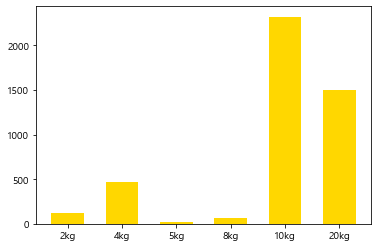

In [37]:
# 무게에 따른 결제수량
x = np.arange(6)
years = ['2kg','4kg','5kg','8kg','10kg','20kg']
values = [124, 463, 20, 66, 2321, 1504]

plt.bar(x, values, width=0.6, color="gold",
        linewidth=3, tick_label=years)

plt.show()

# 품종

In [48]:
# load data
# 2021-01-01_2021-06-30
online_data_2 = pd.read_csv("C:/nh/품종.csv")
online_data_2.head()

,상품카테고리(세),상품명,품종,무게,성별,나이,결제금액,결제수,결제상품수량,환불금액,환불건수,환불수량,실결제금액,실결제수량
0,백미,NH신동진쌀,신동진,10kg,남성,36~40,"274,200",5,8,0,0,0,274200,8
1,백미,NH신동진쌀,신동진,10kg,여성,36~40,"68,800",2,2,0,0,0,68800,2
2,백미,NH신동진쌀,신동진,10kg,여성,46~50,"68,800",2,2,0,0,0,68800,2
3,백미,NH신동진쌀,신동진,10kg,남성,41~45,"68,800",2,2,0,0,0,68800,2
4,백미,NH신동진쌀,신동진,10kg,남성,61~65,"68,800",2,2,0,0,0,68800,2


In [50]:
# 상품에 따른 결제수량
grouped_name_m = online_data_2.groupby('품종').sum()['실결제수량']
grouped_name_m.head(60)

품종
고시히카리     763
삼광        289
새청무        52
신동진       786
십리향       120
영호진미      321
오대         33
일미         39
일품        307
진상         49
참드림         2
추청       1481
하이아미       33
혼합        223
Name: 실결제수량, dtype: int64

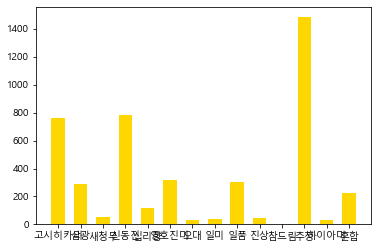

In [53]:
# 품종에 따른 결제수량
x = np.arange(14)
years = ['고시히카리','삼광','새청무','신동진','십리향','영호진미','오대','일미','일품','진상','참드림','추청','하이아미', '혼합']
values = [763, 289, 52, 786, 120, 321, 33, 39, 307, 49, 2, 1481, 33, 223]

plt.bar(x, values, width=0.6, color="gold",
        linewidth=3, tick_label=years)

plt.show()

In [45]:
# 상품에 따른 결제수량
grouped_name_m = online_data.groupby('품종').sum()['실결제금액']
grouped_name_m.head(60)

품종
고시히카리    31389300
삼광       12201200
새청무       3123400
신동진      43958900
십리향       4356500
영호진미     11090900
오대         728000
일미        1972000
일품       14406600
진상        1808500
참드림         73000
추정       16568900
추청       49257200
하이아미      1483000
혼합        8881000
Name: 실결제금액, dtype: int64